In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

EXP_NAME = "logs/tunnel"

MAX_ROUNDS = 70
MAX_YVAL = 5

RESULTS_DIR = os.path.join( os.getcwd(),'results')

headers = ['time', 'start_transfer', 'download','status','size']
dtypes = [pd.datetime, float, float, int, int]

##SET SEABORN STYLE
sns.set_style("whitegrid")
sns.set_context("paper")

##SET MATPLOTLIB STYLE
TICKS_FONTSIZE = 16
LABEL_FONTSIZE=18
LEGEND_FONTSIZE=15
linestyles = (':','-','.','--')

mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE 
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['legend.fontsize'] = TICKS_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['axes.titlesize'] = LABEL_FONTSIZE
mpl.rcParams['font.size'] = LABEL_FONTSIZE
plt.rc('legend',**{'fontsize':LEGEND_FONTSIZE})


#Read input files from the directory and returns DataTable object in a combined list
def read_inputs(flag):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, f))]
    
    #Load results from each node
    nodes_results = {}
    for sub_dir in dirs:
        nodes = [f for f in os.listdir(INPUT_DIR+'/'+sub_dir+'/'+'100mb') 
                 if os.path.isfile(os.path.join(INPUT_DIR+'/'+sub_dir+'/100mb', f))]
        for node in nodes:
            file = os.path.join(INPUT_DIR+'/'+sub_dir+'/100mb/',node)
            try:
                temp = pd.read_csv(file, sep=',', header=None)
                temp.columns = headers
                temp = temp.query('status == 200 & size >0')
                temp = temp.set_index(pd.DatetimeIndex(temp.time))
                if node in nodes_results:
                    temp_concat = pd.concat([nodes_results[node], temp])
                    nodes_results[node] = temp_concat
                    print('Coming:', node,':', len(nodes_results[node]))
                else:
                    nodes_results[node] = temp
                    print('Coming youtube:',node)
            except Exception as e:
                print(node, 'EXception', e)        
        
    return nodes_results
    
nodes_all = read_inputs(2)

Coming youtube: server87
Coming youtube: server59
Coming youtube: server108
Coming: server87 : 1371
Coming: server59 : 1375
Coming: server108 : 1372
Coming: server87 : 2832
Coming: server59 : 3026
Coming: server108 : 3006
Coming: server87 : 4305
Coming: server59 : 4684
Coming: server108 : 4648
Coming: server87 : 5650
Coming: server59 : 6028
Coming: server108 : 5993
Coming: server87 : 6912
Coming: server59 : 7291
Coming: server108 : 7255


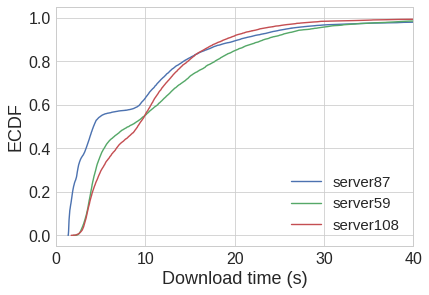

In [19]:
def plot_ecdf(results, var, title):
    """Plot the ECDF of the median accross the nodes of a variable"""
    lbl = []
    for v in var:
        series = pd.Series(results[v].download)
        getECDF(results[v],'download').plot()
        lbl.append(v)
    plt.legend(lbl, loc = 'lower right')
    plt.xlabel('Download time (s)')
    plt.ylabel('ECDF')
    plt.xlim(0,40)
    plt.show()
    
######### Assistant functions###############

def getECDF(df, var):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[var].value_counts()
    return df.sort_index().cumsum()*1./df.sum()

plot_ecdf(nodes_all,list(nodes_all),  'download')

In [1]:
import os
#import ipdb

import pandas as pd
import matplotlib as mpl
from matplotlib import lines
from matplotlib import pyplot as plt
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns

EXP_NAME = "logs/tunnel"

MAX_ROUNDS = 70
MAX_YVAL = 5

RESULTS_DIR = os.path.join( os.getcwd(),'results')

headers = ['time', 'start_transfer', 'download','status','size']
dtypes = [pd.datetime, float, float, int, int]

##SET SEABORN STYLE
sns.set_style("whitegrid")
sns.set_context("paper")

##SET MATPLOTLIB STYLE
TICKS_FONTSIZE = 16
LABEL_FONTSIZE=18
LEGEND_FONTSIZE=15
linestyles = (':','-','.','--')

mpl.rcParams['xtick.labelsize'] = TICKS_FONTSIZE 
mpl.rcParams['ytick.labelsize'] = TICKS_FONTSIZE
mpl.rcParams['legend.fontsize'] = TICKS_FONTSIZE
mpl.rcParams['axes.labelsize'] = LABEL_FONTSIZE
mpl.rcParams['axes.titlesize'] = LABEL_FONTSIZE
mpl.rcParams['font.size'] = LABEL_FONTSIZE
plt.rc('legend',**{'fontsize':LEGEND_FONTSIZE})


#Read input files from the directory and returns DataTable object in a combined list
def read_inputs(flag):
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, f))]
    
    #Load results from each node
    nodes_results = {}
    for sub_dir in dirs:
        nodes = [f for f in os.listdir(INPUT_DIR+'/'+sub_dir+'/'+'youtube') 
                 if os.path.isfile(os.path.join(INPUT_DIR+'/'+sub_dir+'/youtube', f))]
        nodes_bbc = [f for f in os.listdir(INPUT_DIR+'/'+sub_dir+'/'+'bbc') 
                 if os.path.isfile(os.path.join(INPUT_DIR+'/'+sub_dir+'/bbc', f))]
        for node in nodes:
            file = os.path.join(INPUT_DIR+'/'+sub_dir+'/youtube/',node)
            try:
                temp = pd.read_csv(file, sep=',', header=None)
                temp.columns = headers
                temp = temp.query('status == 200 & size >0')
                temp = temp.set_index(pd.DatetimeIndex(temp.time))
                if node in nodes_results:
                    temp_concat = pd.concat([nodes_results[node], temp])
                    nodes_results[node] = temp_concat
                    print('Coming youtube:', node,':', len(nodes_results[node]))
                else:
                    nodes_results[node] = temp
                    print('Coming youtube:',node)
            except Exception as e:
                print(node, 'EXception', e)
        for node in nodes_bbc:
            file = os.path.join(INPUT_DIR+'/'+sub_dir+'/bbc/',node)
            try:
                temp = pd.read_csv(file, sep=',', header=None)
                temp.columns = headers
                temp = temp.query('status == 200 & size >0')
                temp = temp.set_index(pd.DatetimeIndex(temp.time))
                if node in nodes_results:
                    temp_concat = pd.concat([nodes_results[node], temp])
                    nodes_results[node] = temp_concat
                    print('Coming bbc:', node,':', len(nodes_results[node]))
                else:
                    nodes_results[node] = temp
                    print('Coming bbc:',node)
            except Exception as e:
                print(node, 'EXception', e)
        
    return nodes_results
    
nodes_all = read_inputs(2)
#print(nodes_all)

Coming youtube: server87
Coming youtube: server59
Coming youtube: server108
Coming bbc: server87 : 1508
Coming bbc: server59 : 1506
Coming bbc: server108 : 1509
Coming youtube: server87 : 2123
Coming youtube: server59 : 2124
Coming youtube: server108 : 2125
Coming bbc: server87 : 2732
Coming bbc: server59 : 2742
Coming bbc: server108 : 2741
Coming youtube: server87 : 4194
Coming youtube: server59 : 4393
Coming youtube: server108 : 4375
Coming bbc: server87 : 5656
Coming bbc: server59 : 6041
Coming bbc: server108 : 6008
Coming youtube: server87 : 7130
Coming youtube: server59 : 7698
Coming youtube: server108 : 7649
Coming bbc: server87 : 8604
Coming bbc: server59 : 9355
Coming bbc: server108 : 9290
Coming youtube: server87 : 9949
Coming youtube: server59 : 10699
Coming youtube: server108 : 10635
Coming bbc: server87 : 11293
Coming bbc: server59 : 12043
Coming bbc: server108 : 11980
Coming youtube: server87 : 12555
Coming youtube: server59 : 13305
Coming youtube: server108 : 13242
Coming

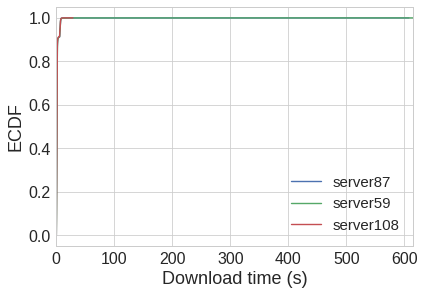

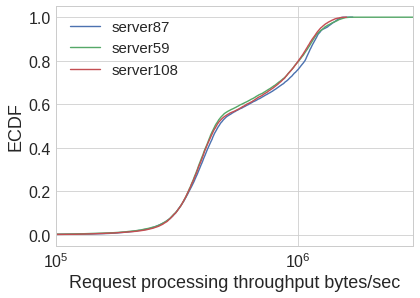

In [3]:
def plot_ecdf(results, var, title):
    """Plot the ECDF of the median accross the nodes of a variable"""
    lbl = []
    for v in var:
        series = pd.Series(results[v].download)
        getECDF(results[v],'download').plot()
        lbl.append(v)
    plt.legend(lbl, loc = 'lower right')
    plt.xlabel('Download time (s)')
    plt.ylabel('ECDF')
    plt.xlim(0)
    plt.show()
    
######### Assistant functions###############

def getECDF(df, var):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[var].value_counts()
    return df.sort_index().cumsum()*1./df.sum()

def plot_bytes_per_second(results,var):
    labels = []
    for key in results:
        df = results[key]
        df = df.set_index(pd.DatetimeIndex(df.time))
        df['bytes_second'] = df['size']/(df['download'] - df['start_transfer'])
        labels.append(key)
        getECDF(df, 'bytes_second').plot(logx=True)
    plt.legend(labels)
    plt.ylabel('ECDF')
    plt.xlabel('Request processing throughput bytes/sec')
    plt.xlim(100000)
    plt.show()

plot_ecdf(nodes_all,list(nodes_all), 'download')
plot_bytes_per_second(nodes_all, 'download')

In [2]:
#Read input files from the directory and returns DataTable object in a combined list
def read_tunnels():
    #Get list of nodes(files) with results
    INPUT_DIR = os.path.join( os.getcwd(), EXP_NAME)
    dirs = [f for f in os.listdir(INPUT_DIR) if os.path.isdir(os.path.join(INPUT_DIR, f))]
    #Load results from each node
    nodes_results = {}
    for sub_dir in dirs:
        client_nodes = [f for f in os.listdir(INPUT_DIR+'/'+sub_dir) if os.path.isdir(os.path.join(INPUT_DIR+'/'+sub_dir, f))]
        #print(client_nodes)
        for node in client_nodes:
            tunnel_nodes = os.listdir(INPUT_DIR+'/'+sub_dir+'/'+node)
            for tunnel in tunnel_nodes:                
                file = os.path.join(INPUT_DIR+'/'+sub_dir+'/'+node,tunnel)
                try:
                    temp = pd.read_csv(file,sep=',', header = None)
                    temp.columns = headers
                    temp = temp.query('status == 200 & size >0')
                    temp = temp.set_index(pd.DatetimeIndex(temp.time))
                    if tunnel in nodes_results:
                        temp_concat = pd.concat([nodes_results[tunnel], temp])
                        nodes_results[tunnel] = temp_concat
                        #print('Coming:', tunnel,':', len(nodes_results[tunnel]))
                    else:
                        nodes_results[tunnel] = temp
                        #print('Coming:',tunnel)
                except Exception as e:
                    print(node, 'EXception', e)  
    return nodes_results

tunnel_data = read_tunnels()

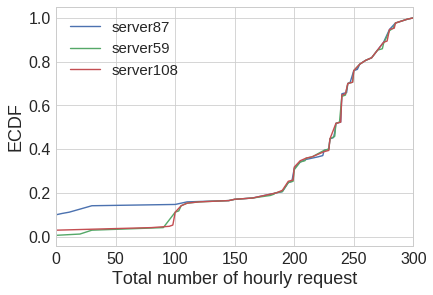

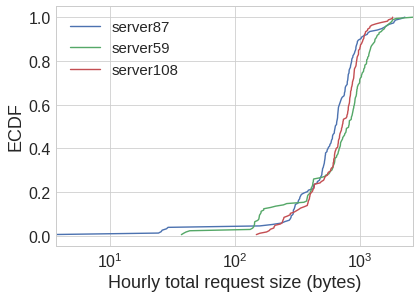

In [6]:
def getECDF(df, var):
    """Helper function that caclulates the ECDF of a dataframe"""
    df = df[var].value_counts()
    return df.sort_index().cumsum()*1./df.sum()

def plot_hourly_request_number(results, var):
    labels = []
    for key in results:
        results[key] = results[key].set_index(pd.DatetimeIndex(results[key].time))
        labels.append(key)
        getECDF(results[key].resample('60Min').count(), var).plot()
    plt.legend(labels)
    plt.ylabel('ECDF')
    plt.xlabel('Total number of hourly request')
    plt.show()

def plot_hourly_request_size(results,var):  
    labels = []
    for key in results:
        results[key] = results[key].set_index(pd.DatetimeIndex(results[key].time))
        labels.append(key)
        getECDF(results[key].resample('60Min').sum(), var).plot(logx=True)        
    plt.legend(labels)
    plt.ylabel('ECDF')
    plt.xlabel('Hourly total request size (bytes)')
    plt.show()

plot_hourly_request_number(tunnel_data, 'download')
plot_hourly_request_size(tunnel_data,'download')